#### PA_distribution_AGN_split
---

1. Selects galaxies based on AGN luminosity and plots the distributions of PA (z=0 only)
2. Need to be careful about mass differences between samples. 
3. Maybe make control sample to compare to...

---

In [1]:
import h5py 
import pandas as pd 
import matplotlib.pyplot as plt
import split_population
import plot_population
import imp
imp.reload(split_population)
import numpy as np
from astropy.cosmology import Planck15
import kin_morph_funcs as knf
import scipy.stats

/Users/cd201/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from matplotlib import rc
rc('text', usetex=True)

from matplotlib import rcParams
rcParams['axes.linewidth'] = 2.5
rcParams['ytick.major.size'] = 5
rcParams['ytick.major.width'] = 2
rcParams['xtick.major.size'] = 5
rcParams['xtick.major.width'] = 2

rcParams['ytick.minor.size'] = 3.5
rcParams['ytick.minor.width'] = 1.5
rcParams['xtick.minor.size'] = 3.5
rcParams['xtick.minor.width'] = 1.5

rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

In [3]:
plotpath = '/Users/cd201/projects/bh_star_gas_misalignment/local/plots/'

In [4]:
# ---------------------------------------------------------------------------------------
# Loading in TNG100 sample with z=0 info to select samples.
tng100_main = pd.read_csv('/Users/cd201/morphology_misalignment/catalogues/tng100_mpl8_pa_info_v0.1_z0_info.csv', comment='#')
tng100_pa = split_population.tng100_pa_sample(tng100_main)

# Breaking down morphology (deviations from sfms).
QU, SF, GV = split_population.SFMS_breakdown(tng100_pa)

# ---------------------------------------------------------------------------------------
# Loading in mass history file.
mass_tab = pd.read_csv('/Users/cd201/projects/bh_star_gas_misalignment/popeye/catalogues/tng100_bh_history.csv')
mass_tab['branch_lookback_time'] = Planck15.lookback_time(mass_tab.branch_z.values).value
# ---------------------------------------------------------------------------------------

In [5]:
def create_matched_mass_sample(masses, tab):
    '''
    Given a set of masses, this returns a control sample with a similar mass distribution.
    Make sure that the you have removed the comparison sample from your table.
    '''
    indices = np.array([])
    for mass in masses:
        idx = (np.abs(tab.stel_mass_x.values - mass)).argmin()
        indices = np.append(indices, idx)
    return tab.iloc[indices]

def create_matched_mass_sample_unique(masses, tab, col_name='stel_mass_x'):
    '''
    Given a set of masses, this returns a control sample with a similar mass distribution. 
    Each match in the control sample will be a unique galaxy.
    Make sure that the you have removed the comparison sample from your table.
    '''
    iter_tab = tab
    indices = np.array([])
    for mass in masses:
        idx = iter_tab.index[(np.abs(iter_tab[col_name].values - mass)).argmin()]
        indices = np.append(indices, idx)
        iter_tab = iter_tab.drop(idx)
    return tab.loc[indices]

### Plotting all distributions split on z=0 BH luminosity

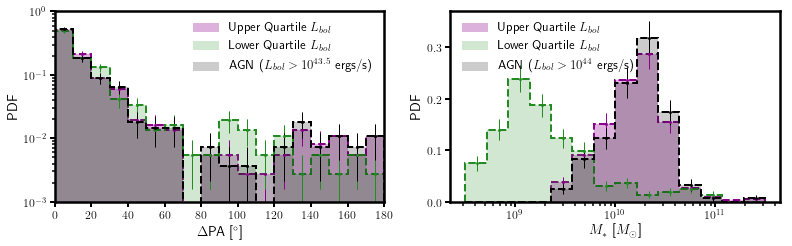

Bottom quartile median: 10.0. std: 31.42249914923191
Top quartile median: 9.0. std: 35.50987240394631
AGN median: 9.0. std: 36.553738708614425
low-high: Ks_2sampResult(statistic=0.052197802197802234, pvalue=0.6930616020990739)
AGN-high: Ks_2sampResult(statistic=0.01797119847661366, pvalue=0.999999999489154)
low-AGN: Ks_2sampResult(statistic=0.04329154599912721, pvalue=0.9242847867831454)


In [6]:
all_lum, low_BHlum, high_BHlum = split_population.combine_with_tree_split_on_BHlum_percentile(tng100_pa, mass_tab, 10, 90)
_, _, AGN = split_population.combine_with_tree_split_on_BHlum(tng100_pa, mass_tab, 43.5)

fig, ax = plt.subplots(1,2, figsize=(13,3.5))
bins = np.linspace(0, 180, 19)
knf.histerr(high_BHlum.pa_offset.values, ax[0], bins, color='darkmagenta', linestyle='dashed', label=None)
knf.histerr_fill(high_BHlum.pa_offset.values, ax[0], bins, color='darkmagenta', linestyle='dashed', label='Upper Quartile $L_{bol}$')
knf.histerr(low_BHlum.pa_offset.values, ax[0], bins, color='forestgreen', linestyle='dashed', label=None)
knf.histerr_fill(low_BHlum.pa_offset.values, ax[0], bins, color='forestgreen', linestyle='dashed', label='Lower Quartile $L_{bol}$', alpha=0.2)
knf.histerr(AGN.pa_offset.values, ax[0], bins, color='k', linestyle='dashed', label=None)
knf.histerr_fill(AGN.pa_offset.values, ax[0], bins, color='k', linestyle='dashed', label='AGN ($L_{bol} > 10^{43.5}$ ergs/s)', alpha=0.2)

ax[0].set_xlabel('$\Delta$PA [$^{\circ}$]', fontsize=14)
ax[0].set_ylabel('PDF', fontsize=14)
ax[0].set_xlim([0,180])
ax[0].set_ylim([10**-3, 1])
ax[0].set_yscale('log')
ax[0].legend(frameon=False, fontsize=13)

bins = np.logspace(8.5, 11.5, 15)
knf.histerr(high_BHlum.stel_mass_x.values, ax[1], bins, color='darkmagenta', linestyle='dashed', label=None)
knf.histerr_fill(high_BHlum.stel_mass_x.values, ax[1], bins, color='darkmagenta', linestyle='dashed', label='Upper Quartile $L_{bol}$')
knf.histerr(low_BHlum.stel_mass_x.values, ax[1], bins, color='forestgreen', linestyle='dashed', label=None)
knf.histerr_fill(low_BHlum.stel_mass_x.values, ax[1], bins, color='forestgreen', linestyle='dashed', label='Lower Quartile $L_{bol}$', alpha=0.2)
knf.histerr(AGN.stel_mass_x.values, ax[1], bins, color='k', linestyle='dashed', label=None)
knf.histerr_fill(AGN.stel_mass_x.values, ax[1], bins, color='k', linestyle='dashed', label='AGN ($L_{bol} > 10^{44}$ ergs/s)', alpha=0.2)

ax[1].set_xlabel('$M_{*}$ [$M_{\odot}$]', fontsize=14)
ax[1].set_ylabel('PDF', fontsize=14)
ax[1].set_xscale('log')
ax[1].legend(frameon=False, fontsize=13, loc='upper left')

plt.show()

print('Bottom quartile median: '+str(np.median(low_BHlum.pa_offset.values))+'. std: '+str(np.std(low_BHlum.pa_offset.values)))
print('Top quartile median: '+str(np.median(high_BHlum.pa_offset.values))+'. std: '+str(np.std(high_BHlum.pa_offset.values)))
print('AGN median: '+str(np.median(AGN.pa_offset.values))+'. std: '+str(np.std(AGN.pa_offset.values)))

### KS tests.
print('low-high: '+str(scipy.stats.ks_2samp(low_BHlum.pa_offset.values, high_BHlum.pa_offset.values)))
print('AGN-high: '+str(scipy.stats.ks_2samp(AGN.pa_offset.values, high_BHlum.pa_offset.values)))
print('low-AGN: '+str(scipy.stats.ks_2samp(low_BHlum.pa_offset.values, AGN.pa_offset.values)))

---

#### 2. Creating matched mass sample
1. Despite the similarity between the the PA distributions, the mass distributions are very different. Lets compare the distributions against a control.

---

In [11]:
# creating a mass matched control sample for the high lum quartile.

# firstly creating table where high lum has been removed.
resid_tab = all_lum.drop(high_BHlum.index)
# creating control
control_tab = create_matched_mass_sample_unique(high_BHlum.stel_mass_x.values, resid_tab)

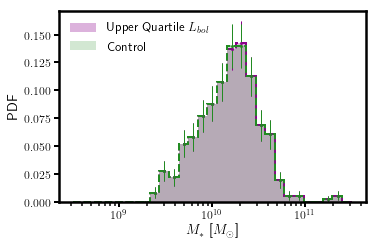

In [12]:
### plotting mass distributions for high lum and control.
fig, ax = plt.subplots(1, figsize=(5.5,3.5))
bins = np.logspace(8.5, 11.5, 30)
knf.histerr(high_BHlum.stel_mass_x.values, ax, bins, color='darkmagenta', linestyle='dashed', label=None)
knf.histerr_fill(high_BHlum.stel_mass_x.values, ax, bins, color='darkmagenta', linestyle='dashed', label='Upper Quartile $L_{bol}$')
knf.histerr(control_tab.stel_mass_x.values, ax, bins, color='forestgreen', linestyle='dashed', label=None)
knf.histerr_fill(control_tab.stel_mass_x.values, ax, bins, color='forestgreen', linestyle='dashed', label='Control', alpha=0.2)

ax.set_xlabel('$M_{*}$ [$M_{\odot}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xscale('log')
ax.legend(frameon=False, fontsize=13, loc='upper left')
plt.show()

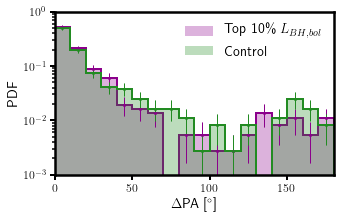

Top 10% mean: 21.89423076923077. std: 35.50987240394631
Control mean: 26.418956043956044. std: 40.60271736167315
Control-Top: Ks_2sampResult(statistic=0.07142857142857151, pvalue=0.3003299908939259)


In [13]:
fig, ax = plt.subplots(1, figsize=(5,3))
bins = np.linspace(0, 180, 19)
knf.histerr(high_BHlum.pa_offset.values, ax, bins, color='darkmagenta', linestyle='solid', label=None)
knf.histerr_fill(high_BHlum.pa_offset.values, ax, bins, color='darkmagenta', linestyle='dashed', label='Top 10\% $L_{BH, bol}$')
knf.histerr(control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='solid', label=None)
knf.histerr_fill(control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='dashed', label='Control')
# knf.histerr(AGN.pa_offset.values, ax, bins, color='k', linestyle='dashed', label=None)
# knf.histerr_fill(AGN.pa_offset.values, ax, bins, color='k', linestyle='dashed', label='AGN ($L_{bol} > 10^{43.5}$ ergs/s)', alpha=0.2)

ax.set_xlabel('$\Delta$PA [$^{\circ}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim([0,180])
ax.set_ylim([10**-3, 1])
ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
plt.show()
#plt.savefig(plotpath+'PA_distribution_BHlum_split.pdf', format='pdf', bbox_inches='tight')

print('Top 10% mean: '+str(np.mean(high_BHlum.pa_offset.values))+'. std: '+str(np.std(high_BHlum.pa_offset.values)))
print('Control mean: '+str(np.mean(control_tab.pa_offset.values))+'. std: '+str(np.std(control_tab.pa_offset.values)))

### KS tests.
print('Control-Top: '+str(scipy.stats.ks_2samp(control_tab.pa_offset.values, high_BHlum.pa_offset.values)))

### Computing maximum AGN luminosity within last 8Gyr

In [7]:
def max_Lbol(sub):
    # only returning individual object tree.
    mask = (mass_tab.root_subfind.values == sub)
    # finding maximum Lbol
    try:
        Lbol = np.max(mass_tab.log10_Lbh_bol.values[mask])
    except:
        Lbol = np.NaN
    return Lbol

In [8]:
# defining new column.
maximum_Lbol_last8Gyr = []

for sub in tng100_pa.subfind_id.values:
    maximum_Lbol_last8Gyr.append(max_Lbol(sub))

tng100_pa['maximum_Lbol_last8Gyr'] = np.array(maximum_Lbol_last8Gyr)

/Users/cd201/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


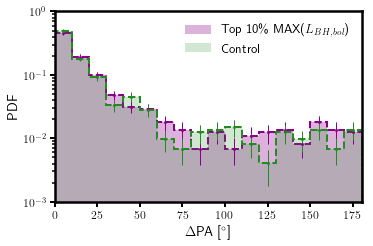

Top quartile mean: 29.531593406593405. std: 42.136800909272274
Control mean: 26.824175824175825. std: 40.15954607318478
Control-Top: Ks_2sampResult(statistic=0.04945054945054944, pvalue=0.32788402235047986)


In [10]:
# defining top 10% of max_Lbol.

tng100_pa = tng100_pa[~np.isnan(tng100_pa.maximum_Lbol_last8Gyr.values)]
top_bins = np.percentile(tng100_pa.maximum_Lbol_last8Gyr.values, 80)
Lbol_high = tng100_pa[tng100_pa.maximum_Lbol_last8Gyr.values > top_bins]

# creating table where the high Lbol have been removed.
resid_tab = tng100_pa.drop(Lbol_high.index)
# creating control
control_tab = create_matched_mass_sample_unique(Lbol_high.stel_mass.values, resid_tab, col_name='stel_mass')

fig, ax = plt.subplots(1, figsize=(5.5,3.5))
bins = np.linspace(0, 180, 19)
knf.histerr(Lbol_high.pa_offset.values, ax, bins, color='darkmagenta', linestyle='dashed', label=None)
knf.histerr_fill(Lbol_high.pa_offset.values, ax, bins, color='darkmagenta', linestyle='dashed', label='Top 10\% MAX($L_{BH, bol}$)')
knf.histerr(control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='dashed', label=None)
knf.histerr_fill(control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='dashed', label='Control', alpha=0.2)

ax.set_xlabel('$\Delta$PA [$^{\circ}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim([0,180])
ax.set_ylim([10**-3, 1])
ax.set_yscale('log')
ax.legend(frameon=False, fontsize=13)
plt.show()

print('Top quartile mean: '+str(np.mean(Lbol_high.pa_offset.values))+'. std: '+str(np.std(Lbol_high.pa_offset.values)))
print('Control mean: '+str(np.mean(control_tab.pa_offset.values))+'. std: '+str(np.std(control_tab.pa_offset.values)))

### KS tests.
print('Control-Top: '+str(scipy.stats.ks_2samp(control_tab.pa_offset.values, Lbol_high.pa_offset.values)))

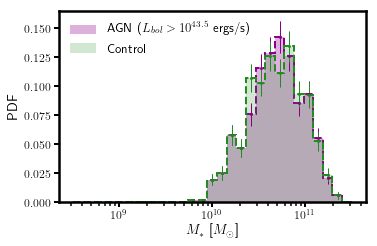

In [65]:
### plotting mass distributions for high lum and control.
fig, ax = plt.subplots(1, figsize=(5.5,3.5))
bins = np.logspace(8.5, 11.5, 30)
knf.histerr(Lbol_high.stel_mass.values, ax, bins, color='darkmagenta', linestyle='dashed', label=None)
knf.histerr_fill(Lbol_high.stel_mass.values, ax, bins, color='darkmagenta', linestyle='dashed', label='AGN ($L_{bol} > 10^{43.5}$ ergs/s)')
knf.histerr(control_tab.stel_mass.values, ax, bins, color='forestgreen', linestyle='dashed', label=None)
knf.histerr_fill(control_tab.stel_mass.values, ax, bins, color='forestgreen', linestyle='dashed', label='Control', alpha=0.2)

ax.set_xlabel('$M_{*}$ [$M_{\odot}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xscale('log')
ax.legend(frameon=False, fontsize=13, loc='upper left')
plt.show()

### Now just comparing for the low mass galaxies.
1. Comparing distributions at z=0
2. Comparing distributions split on max past Blum ( maybe also try just last 4Gyr). 

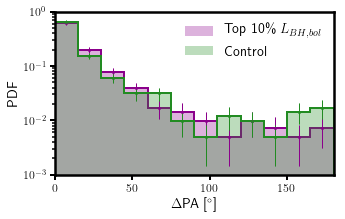

Top 10% mean: 21.026634382566584. std: 29.600066545872444
Control mean: 22.926150121065376. std: 35.55087060701793
Control-Top: Ks_2sampResult(statistic=0.05569007263922521, pvalue=0.5321807742557564)
Control-Top: Anderson_ksampResult(statistic=-0.0008856716416293078, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.34845096207937265)


/Users/cd201/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [11]:
tng100_pa_lm = tng100_pa[tng100_pa.stel_mass.values < 10**10.2]
all_lum_lm, low_BHlum_lm, high_BHlum_lm = split_population.combine_with_tree_split_on_BHlum_percentile(tng100_pa_lm, mass_tab, 10, 80)
# creating a mass matched control sample for the high lum quartile.
# firstly creating table where high lum has been removed.
resid_tab = all_lum_lm.drop(high_BHlum_lm.index)

# creating control
control_tab = create_matched_mass_sample_unique(high_BHlum_lm.stel_mass_x.values, resid_tab)

fig, ax = plt.subplots(1, figsize=(5,3))
bins = np.linspace(0, 180, 13)
knf.histerr(high_BHlum_lm.pa_offset.values, ax, bins, color='darkmagenta', linestyle='solid', label=None)
knf.histerr_fill(high_BHlum_lm.pa_offset.values, ax, bins, color='darkmagenta', linestyle='dashed', label='Top 10\% $L_{BH, bol}$')
knf.histerr(control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='solid', label=None)
knf.histerr_fill(control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='dashed', label='Control')
ax.set_xlabel('$\Delta$PA [$^{\circ}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim([0,180])
ax.set_ylim([10**-3, 1])
ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
plt.show()

print('Top 10% mean: '+str(np.mean(high_BHlum_lm.pa_offset.values))+'. std: '+str(np.std(high_BHlum_lm.pa_offset.values)))
print('Control mean: '+str(np.mean(control_tab.pa_offset.values))+'. std: '+str(np.std(control_tab.pa_offset.values)))

### KS tests.
print('Control-Top: '+str(scipy.stats.ks_2samp(control_tab.pa_offset.values, high_BHlum_lm.pa_offset.values)))
### Anderson darling test.
print('Control-Top: '+str(scipy.stats.anderson_ksamp((control_tab.pa_offset.values, high_BHlum_lm.pa_offset.values))))


### Now comparing for Lmax over last 8 Gyr.

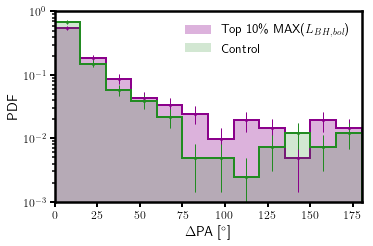

Top quartile mean: 28.25181598062954. std: 38.25634547179302
Control mean: 19.663438256658594. std: 31.566591203170425
Control-Top: Ks_2sampResult(statistic=0.14769975786924944, pvalue=0.0002081354441506274)
Control-Top: Anderson_ksampResult(statistic=13.793420235221449, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=2.5140905636203467e-05)


/Users/cd201/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [12]:
# defining top 10% of max_Lbol.
tng100_pa = tng100_pa[~np.isnan(tng100_pa.maximum_Lbol_last8Gyr.values)]
top_bins = np.percentile(tng100_pa_lm.maximum_Lbol_last8Gyr.values, 80)
Lbol_high = tng100_pa_lm[tng100_pa_lm.maximum_Lbol_last8Gyr.values > top_bins]

# creating table where the high Lbol have been removed.
resid_tab = tng100_pa_lm.drop(Lbol_high.index)
# creating control
max_control_tab = create_matched_mass_sample_unique(Lbol_high.stel_mass.values, resid_tab, col_name='stel_mass')

fig, ax = plt.subplots(1, figsize=(5.5,3.5))
bins = np.linspace(0, 180, 13)
knf.histerr(Lbol_high.pa_offset.values, ax, bins, color='darkmagenta', linestyle='solid', label=None)
knf.histerr_fill(Lbol_high.pa_offset.values, ax, bins, color='darkmagenta', linestyle='dashed', label='Top 10\% MAX($L_{BH, bol}$)')
knf.histerr(max_control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='solid', label=None)
knf.histerr_fill(max_control_tab.pa_offset.values, ax, bins, color='forestgreen', linestyle='dashed', label='Control', alpha=0.2)

ax.set_xlabel('$\Delta$PA [$^{\circ}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim([0,180])
ax.set_ylim([10**-3, 1])
ax.set_yscale('log')
ax.legend(frameon=False, fontsize=13)
plt.show()

print('Top quartile mean: '+str(np.mean(Lbol_high.pa_offset.values))+'. std: '+str(np.std(Lbol_high.pa_offset.values)))
print('Control mean: '+str(np.mean(max_control_tab.pa_offset.values))+'. std: '+str(np.std(max_control_tab.pa_offset.values)))

### KS tests.
print('Control-Top: '+str(scipy.stats.ks_2samp(max_control_tab.pa_offset.values, Lbol_high.pa_offset.values)))
print('Control-Top: '+str(scipy.stats.anderson_ksamp((max_control_tab.pa_offset.values, Lbol_high.pa_offset.values))))


### Combining both z=0 and over last 8 Gyr plots or low mass galaxies.

In [17]:
fig, ax = plt.subplots(2, figsize=(5.3, 5.7), sharex='all', sharey='all')

bins = np.linspace(0, 180, 13)
knf.histerr(high_BHlum_lm.pa_offset.values, ax[0], bins, color='darkmagenta', linestyle='solid', label=None)
knf.histerr_fill(high_BHlum_lm.pa_offset.values, ax[0], bins, color='darkmagenta', linestyle='dashed', label='Top 20\% $L_{bol}(z=0)$')
knf.histerr(control_tab.pa_offset.values, ax[0], bins, color='forestgreen', linestyle='solid', label=None)
knf.histerr_fill(control_tab.pa_offset.values, ax[0], bins, color='forestgreen', linestyle='dashed', label='Control')

knf.histerr(Lbol_high.pa_offset.values, ax[1], bins, color='darkmagenta', linestyle='solid', label=None)
knf.histerr_fill(Lbol_high.pa_offset.values, ax[1], bins, color='darkmagenta', linestyle='dashed', label='Top 20\% $\max{L_{bol}(8Gyrs)}$')
knf.histerr(max_control_tab.pa_offset.values, ax[1], bins, color='forestgreen', linestyle='solid', label=None)
knf.histerr_fill(max_control_tab.pa_offset.values, ax[1], bins, color='forestgreen', linestyle='dashed', label='Control', alpha=0.2)

ax[0].set_ylabel('PDF', fontsize=14)
ax[1].set_xlabel('$\Delta$PA [$^{\circ}$]', fontsize=14)
ax[1].set_ylabel('PDF', fontsize=14)
ax[1].set_xlim([0,180])
ax[1].set_ylim([10**-3 + 10**-4, 9.5])
ax[1].set_yscale('log')

ax[0].legend(frameon=False, fontsize=13, loc='upper left')
ax[1].legend(frameon=False, fontsize=13, loc='upper left')

plot_population.xtick_format(20, 10, ax[1], format='%1.0f')

# adding Anderson-Darling test annotations.
z0_ADs, _, z0_ADp = scipy.stats.anderson_ksamp((control_tab.pa_offset.values, high_BHlum_lm.pa_offset.values))
max_ADs, _, max_ADp = scipy.stats.anderson_ksamp((max_control_tab.pa_offset.values, Lbol_high.pa_offset.values))

ax[0].annotate(r'$AD=$'+str(round(z0_ADs, 3))+r' $p=$'+str(np.round(z0_ADp, 3)), 
               xy=(0.535, 0.765), xycoords='axes fraction', fontsize=13.5 )
ax[1].annotate(r'$AD=$'+str(round(max_ADs, 3))+r' $p=$'+str(np.round(max_ADp, 5)), 
               xy=(0.535, 0.765), xycoords='axes fraction', fontsize=13.5 )

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(plotpath+'PA_distribution_low_mass_z0_max_comparison.pdf', format='pdf', bbox_inches='tight')

/Users/cd201/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")
